# Rule Fit applied to CUF

#### Made by:
* Teresa Marcelino (teresamarcelino98@gmail.com)


-------




In [39]:
%store -r Surgeon_model_96440008
%store -r Best_Parameters_Regularizers_Surgeon_96440008
%store -r Rashomon_curve

%store -r Surgeons_Dataset

----



## 1. Load Data and Libraries  <a class="anchor" id="1"></a> 


In [41]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import shap
import matplotlib.pyplot as plt
#from rulefit import RuleFit

import sklearn

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
#Encoder
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import *
import matplotlib
import copy
from datetime import datetime

from sklearn.linear_model import LassoCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

from tabulate import tabulate
import pickle
import math

In [42]:
from sklearn.metrics import mean_squared_error

In [43]:
import RuleFit_withoutCV as RuleFit_withoutCV

import RuleFit_customized as RuleFit_custom
from rulefit import RuleFit 
import pyowl
from pyowl import OwlRegressor

In [44]:
df_test_surgeon = pd.read_csv('Data_test_surgeon',header='infer')
df_test_surgeon


,Urgency,Hospitalization,Gender,Daily Surgery Number_perDoctor,Surgery Number Performed_perDoctor,Procedures_I,Real Room Duration,Age,CUF Planned Duration,I1,Part of the day,Speciality,CUF_Unit,Month,Weekday,Anesthesia
0,0,1,0,1,150,1,16,74.0,20,22.274376,28.212867,28.922468,28.931225,28.601695,28.526646,22.730851
1,0,1,1,5,266,1,12,53.0,20,22.274376,28.212867,28.922468,28.931225,31.794393,29.081590,22.730851
2,0,1,1,2,269,1,39,53.0,20,22.274376,28.212867,28.922468,28.931225,28.581395,28.526646,49.927586
3,0,1,0,2,102,1,20,65.0,20,23.431818,28.212867,28.922468,28.931225,25.790476,29.081590,22.730851
4,0,1,1,4,63,1,20,22.0,20,24.076953,28.212867,28.922468,28.931225,28.039216,28.663239,22.730851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,0,1,0,2,1577,1,25,38.0,30,23.431818,27.390625,28.922468,28.931225,26.371429,28.663239,22.730851
154,0,1,0,5,1589,1,19,41.0,30,24.076953,42.573529,28.922468,28.931225,28.136842,29.081590,49.927586
155,0,1,1,3,1302,1,17,71.0,20,22.274376,28.212867,28.922468,28.931225,29.500000,29.081590,22.730851
156,0,1,1,2,1547,1,14,55.0,30,24.229623,27.390625,28.922468,28.931225,27.347826,29.081590,21.485714


In [45]:
df_train_surgeon = pd.read_csv('Data_withsyntheticdata_surgeon',header='infer')
df_train_surgeon

,Urgency,Hospitalization,Gender,Daily Surgery Number_perDoctor,Surgery Number Performed_perDoctor,Procedures_I,Real Room Duration,Age,CUF Planned Duration,I1,Part of the day,Speciality,CUF_Unit,Month,Weekday,Anesthesia
0,0,1,0,6.0,190.0,1.0,45.000000,73.000000,NaN,52.334804,28.212867,28.922468,28.931225,28.601695,29.081590,49.927586
1,0,1,0,2.0,920.0,2.0,20.000000,68.000000,20.0,22.274376,28.212867,28.922468,28.931225,25.790476,28.526646,22.730851
2,0,1,0,3.0,192.0,1.0,36.832935,71.046403,NaN,53.762436,28.212510,28.922685,28.930151,31.281645,28.848036,41.516894
3,0,1,0,4.0,600.0,1.0,20.000000,80.000000,30.0,22.274376,27.390625,28.922468,28.931225,28.601695,26.365854,22.730851
4,0,1,1,4.0,446.0,1.0,23.000000,56.000000,60.0,22.274376,28.212867,28.922468,28.931225,28.136842,28.663239,22.730851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2456,0,1,0,3.0,455.0,1.0,55.663351,82.065232,NaN,70.357113,28.212969,28.921439,28.931835,29.499133,28.775653,49.928664
2457,0,1,1,7.0,711.0,1.0,51.229983,59.679937,NaN,53.742975,28.213870,28.921902,28.931201,31.823513,28.903062,49.929983
2458,0,1,1,3.0,1218.0,1.0,20.000000,66.000000,30.0,22.274376,28.212867,28.922468,28.931225,27.347826,28.526646,22.730851
2459,0,1,1,4.0,369.0,1.0,28.000000,69.000000,20.0,53.745098,28.212867,28.922468,28.931225,27.347826,28.663239,49.927586


----


## 1. Surgeon-specific RuleFit  <a class="anchor" id="1"></a> 

### 1.1.  Split Data  <a class="anchor" id="1.1"></a> 

In [46]:
train_dataset_surgeons= df_train_surgeon
test_dataset_surgeons = df_test_surgeon


train_features_surgeons = train_dataset_surgeons.copy()
test_features_surgeons = test_dataset_surgeons.copy()

train_labels_surgeons = train_features_surgeons.pop('Real Room Duration')
test_labels_surgeons = test_features_surgeons.pop('Real Room Duration')

train_CUF_labels_surgeons = train_features_surgeons.pop('CUF Planned Duration')
test_CUF_labels_surgeons= test_features_surgeons.pop('CUF Planned Duration')


#Resolve issue "Failed to convert a NumPy array to a Tensor (Unsupported object type int)""
surgeoncolumns=train_features_surgeons.columns
#Dataset
train_dataset_surgeons= np.asarray(train_dataset_surgeons).astype(np.float32)
test_dataset_surgeons = np.asarray(test_dataset_surgeons).astype(np.float32)

#Features
train_features_surgeons= np.asarray(train_features_surgeons).astype(np.float32)
test_features_surgeons = np.asarray(test_features_surgeons).astype(np.float32)

#labels
train_labels_surgeons = np.asarray(train_labels_surgeons).astype(np.float32)
test_labels_surgeons = np.asarray(test_labels_surgeons).astype(np.float32)


#CUF
train_CUF_labels_surgeons = np.asarray(train_CUF_labels_surgeons).astype(np.float32)
test_CUF_labels_surgeons = np.asarray(test_CUF_labels_surgeons).astype(np.float32)


In [47]:
Datasets_surgeon_96440008=Surgeons_Dataset['96440008']

### 1.2.  Parameters Tuning  <a class="anchor" id="1.2"></a> 




In [48]:
Tuning_models = {'Library_Script':['RuleFit_custom',
                                  'RuleFit_withoutCV'], 
                 'Decision_Tree':[RandomForestRegressor,
                                  GradientBoostingRegressor,
                                  BaggingRegressor,
                                  ExtraTreesRegressor],
                 'Regularizers_0':['LassoCV','ElasticNetCV','Pyowl'],
                 'Regularizers_1':['Lasso','ElasticNet','Pyowl'],
                 'Alphas':np.logspace(-8, math.log(3,10), 1000,base=10), #between 10^-7 and 3
                }

Tuning_models.update({'Cs':1./Tuning_models['Alphas']})

In [49]:
Best_Parameters_Decison_Tree_Surgeons= {}

for i in Tuning_models['Decision_Tree']:
    # The Normalization layer
    Best_Parameters_Decison_Tree_Surgeons[i] = {}

In [50]:
Parameters_RandomForestRegressor = {'n_estimators':[100,250,500,750,1000,1250,1500,1750],
              'max_depth':[3,4]}

Parameters_GradientBoostingRegressor = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 
                                        'n_estimators':[100,250,500,750,1000,1250,1500,1750],
                                        'max_depth':[3,4]}

Parameters_BaggingRegressor = {'n_estimators':[100,250,500,750,1000,1250,1500,1750],
                               'base_estimator__max_depth':[3,4]}

Parameters_ExtraTreesRegressor = {'n_estimators':[100,250,500,750,1000,1250,1500,1750],
                                  'max_depth':[3,4]}

Best_Parameters_Decison_Tree_Surgeons[Tuning_models['Decision_Tree'][0]].update({"Search_Parameters": Parameters_RandomForestRegressor})
Best_Parameters_Decison_Tree_Surgeons[Tuning_models['Decision_Tree'][1]].update({"Search_Parameters": Parameters_GradientBoostingRegressor})
Best_Parameters_Decison_Tree_Surgeons[Tuning_models['Decision_Tree'][2]].update({"Search_Parameters": Parameters_BaggingRegressor})
Best_Parameters_Decison_Tree_Surgeons[Tuning_models['Decision_Tree'][3]].update({"Search_Parameters": Parameters_ExtraTreesRegressor})




In [132]:
Surgeon_model_96440008={} #creation of dictionaries for all 442 models 

for j in Tuning_models['Decision_Tree']:
        
    Surgeon_model_96440008[j]={}


* ### 1.2.1  Tuning Decision Trees  <a class="anchor" id="1.2.1"></a> 


In [133]:
for i in range(len(Tuning_models['Decision_Tree'])):
    if i!=2:
        Decison_Tree=Tuning_models['Decision_Tree'][i](random_state=123)
    else:
        Decison_Tree=Tuning_models['Decision_Tree'][i](base_estimator=DecisionTreeRegressor(),random_state=123)

    Parameters_Decision_Tree=Best_Parameters_Decison_Tree_Surgeons[Tuning_models['Decision_Tree'][i]]["Search_Parameters"]

    tuning = GridSearchCV(estimator=Decison_Tree, 
                              param_grid = Parameters_Decision_Tree, 
                              scoring='neg_mean_absolute_error',n_jobs=-1, cv=5,verbose=1)


    tuning.fit(train_features_surgeons, train_labels_surgeons)
    Best_estimator=tuning.best_estimator_
    Best_params=tuning.best_params_

    print(Tuning_models['Decision_Tree'][i])

    Surgeon_model_96440008[Tuning_models['Decision_Tree'][i]].update({"Best_estimator": Best_estimator})
    Surgeon_model_96440008[Tuning_models['Decision_Tree'][i]].update({"Best_params_dict": Best_params})



Fitting 5 folds for each of 16 candidates, totalling 80 fits
<class 'sklearn.ensemble._forest.RandomForestRegressor'>
Fitting 5 folds for each of 96 candidates, totalling 480 fits
<class 'sklearn.ensemble._gb.GradientBoostingRegressor'>
Fitting 5 folds for each of 16 candidates, totalling 80 fits
<class 'sklearn.ensemble._bagging.BaggingRegressor'>
Fitting 5 folds for each of 16 candidates, totalling 80 fits
<class 'sklearn.ensemble._forest.ExtraTreesRegressor'>


In [134]:
%store Surgeon_model_96440008

Stored 'Surgeon_model_96440008' (dict)


### 1.3.  Perform Rulefit for all DecisionTree and Regularizers  <a class="anchor" id="1.3"></a> 


In [135]:
Best_Parameters_Regularizers_Surgeon= {}

for r in Tuning_models['Library_Script']:
        # The Normalization layer
        Best_Parameters_Regularizers_Surgeon[r] = {}

        for l in Tuning_models['Decision_Tree']:
        # The Normalization layer
            Best_Parameters_Regularizers_Surgeon[r][l] = {}

            for j in range(len(Tuning_models['Regularizers_0'])):

                if r==Tuning_models['Library_Script'][0]:

                    Best_Parameters_Regularizers_Surgeon[r][l][Tuning_models['Regularizers_0'][j]]={}

                else:
                    Best_Parameters_Regularizers_Surgeon[r][l][Tuning_models['Regularizers_1'][j]]={}


In [136]:
Parameters=Surgeon_model_96440008[Tuning_models['Decision_Tree'][1]]["Best_params_dict"]
Decison_Tree=Tuning_models['Decision_Tree'][1](random_state=123,learning_rate=Parameters["learning_rate"],max_depth=Parameters["max_depth"],n_estimators=Parameters["n_estimators"])
print(Decison_Tree)
beta=10000
alpha=0.1
Decison_Tree_tune=copy.deepcopy(Decison_Tree)
rf = RuleFit_withoutCV.RuleFit(tree_generator=Decison_Tree_tune, alpha=alpha,beta=beta, max_iter=10e10, regularization='Pyowl',n_jobs=-1)
rf.fit(train_features_surgeons, train_labels_surgeons, feature_names=surgeoncolumns)

rules = rf.get_rules()

reduce_rules = rules[abs(rules.coef) !=0].sort_values("coef", ascending=False)
len(reduce_rules)

GradientBoostingRegressor(max_depth=4, random_state=123)


1414

In [137]:
rf_score = np.round(mean_squared_error(rf.predict(test_features_surgeons),test_labels_surgeons,squared=False))
rf_score

18.0

In [138]:

def percCal(x,y):
    return (x-y)*100/x

In [139]:
r=1

for i in range(len(Tuning_models['Decision_Tree'])):

    Parameters=Surgeon_model_96440008[Tuning_models['Decision_Tree'][i]]["Best_params_dict"]


    if i==0 or i==3:                                                                            
        Decison_Tree=Tuning_models['Decision_Tree'][i](random_state=123,max_depth=Parameters["max_depth"],n_estimators=Parameters["n_estimators"])
        print(Decison_Tree)

    if i==1:                                                                            
        Decison_Tree=Tuning_models['Decision_Tree'][i](random_state=123,learning_rate=Parameters["learning_rate"],max_depth=Parameters["max_depth"],n_estimators=Parameters["n_estimators"])
        print(Decison_Tree)

    if i==2:
        Decison_Tree=Tuning_models['Decision_Tree'][i](base_estimator=DecisionTreeRegressor(max_depth=Parameters["base_estimator__max_depth"]),n_estimators=Parameters["n_estimators"],random_state=123)

        print(Decison_Tree)

    for j in range(len(Tuning_models['Regularizers_0'])):


        Decison_Tree_tune=copy.deepcopy(Decison_Tree)

        if r==0:
            regularizer=Tuning_models['Regularizers_0'][j]

        else:
            regularizer=Tuning_models['Regularizers_1'][j]

        print(regularizer)

        Cs=Tuning_models['Cs']

        beta=0.1
        alpha=0.0001

        if j==2:

            len_reduce_rules=1000
            max_tents=0
            max_tents=0
            minimum_rules=float('Inf')
            while len_reduce_rules>50 and max_tents<=15:

                Decison_Tree_tune=copy.deepcopy(Decison_Tree)

                if r==0:

                    rf = RuleFit_custom.RuleFit(tree_generator=Decison_Tree_tune, Cs=Cs, beta=beta, max_iter=10e10, regularization='Pyowl',n_jobs=-1)

                else:
                    rf = RuleFit_withoutCV.RuleFit(tree_generator=Decison_Tree_tune, Cs=Cs, beta=beta, max_iter=10e10, regularization='Pyowl',n_jobs=-1)


                rf.fit(train_features_surgeons, train_labels_surgeons, feature_names=surgeoncolumns)

                rules = rf.get_rules()

                reduce_rules = rules[abs(rules.coef) !=0].sort_values("coef", ascending=False)

                if len(reduce_rules)< minimum_rules:
                    minimum_rules=len(reduce_rules)
                    max_tents=0

                else:
                    max_tents=max_tents+1


                len_reduce_rules=len(reduce_rules)

                print(len_reduce_rules)

                rf_score = np.round(r2_score(rf.predict(test_features_surgeons),test_labels_surgeons),2)

                predictions=rf.predict(test_features_surgeons)

                beta=beta+1
        else:
            len_reduce_rules=1000
            max_rules=1000
            while len_reduce_rules>50:

                Decison_Tree_tune=copy.deepcopy(Decison_Tree)
                print(max_rules)
                if r==0:
                    rf = RuleFit_custom.RuleFit(max_rules=max_rules,tree_generator=Decison_Tree_tune, alpha=alpha,Cs=Cs, max_iter=10e10, regularization=regularizer,n_jobs=-1)

                else:    
                    rf = RuleFit_withoutCV.RuleFit(tree_generator=Decison_Tree_tune,alpha=alpha, Cs=Cs, max_iter=10e10, regularization=regularizer,n_jobs=-1)


                rf.fit(train_features_surgeons, train_labels_surgeons, feature_names=surgeoncolumns)

                rules = rf.get_rules()

                reduce_rules = rules[abs(rules.coef) !=0].sort_values("coef", ascending=False)


                len_reduce_rules=len(reduce_rules)

                print(len_reduce_rules)
                
                rf_score_mse = np.round(mean_squared_error(rf.predict(test_features_surgeons),test_labels_surgeons))

                
                rf_score_rmse = np.round(mean_squared_error(rf.predict(test_features_surgeons),test_labels_surgeons,squared=False))

                predictions=rf.predict(test_features_surgeons)

                if j==0:
                    if len_reduce_rules>60:
                        alpha+=0.005

                    else:
                        alpha+=0.0005
                        
                if j==1:
                    if len_reduce_rules>60:
                        alpha+=0.7

                    else:
                        alpha+=0.15


                if max_rules<=100:
                    max_rules+=-10

                else:
                    max_rules+=-100



        print(rf_score_rmse)

        dataset_predicton = {"Real Duration": test_labels_surgeons, "Planned by Cuf": test_CUF_labels_surgeons, "Labels from RuleFit": predictions}
        dataset_predicton=pd.DataFrame(dataset_predicton)

        dataset_predicton['Error_RuleFit'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Labels from RuleFit'])
        dataset_predicton['Error_CUF'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Planned by Cuf'])

        CUF_overuse=dataset_predicton[dataset_predicton['Error_CUF']>10].shape[0]/dataset_predicton.shape[0]
        RuleFit_overuse=dataset_predicton[dataset_predicton['Error_RuleFit']>10].shape[0]/dataset_predicton.shape[0]
        #Underutilization
        CUF_under=dataset_predicton[dataset_predicton['Error_CUF']<-10].shape[0]/dataset_predicton.shape[0]
        RuleFit_under=dataset_predicton[dataset_predicton['Error_RuleFit']<-10].shape[0]/dataset_predicton.shape[0]
            #Within
        CUF_Within=dataset_predicton[dataset_predicton['Error_CUF'].abs()<=10].shape[0]/dataset_predicton.shape[0]
        RuleFit_Within=dataset_predicton[dataset_predicton['Error_RuleFit'].abs()<=10].shape[0]/dataset_predicton.shape[0]

        Best_Parameters_Regularizers_Surgeon[Tuning_models['Library_Script'][r]][Tuning_models['Decision_Tree'][i]][regularizer].update({"Model": rf})
        Best_Parameters_Regularizers_Surgeon[Tuning_models['Library_Script'][r]][Tuning_models['Decision_Tree'][i]][regularizer].update({"Rules": rules})

        Best_Parameters_Regularizers_Surgeon[Tuning_models['Library_Script'][r]][Tuning_models['Decision_Tree'][i]][regularizer].update({"Rules_non0": reduce_rules})

        Best_Parameters_Regularizers_Surgeon[Tuning_models['Library_Script'][r]][Tuning_models['Decision_Tree'][i]][regularizer].update({"Number Rules": len(reduce_rules)})
        Best_Parameters_Regularizers_Surgeon[Tuning_models['Library_Script'][r]][Tuning_models['Decision_Tree'][i]][regularizer].update({"Score MSE": rf_score_mse})
        Best_Parameters_Regularizers_Surgeon[Tuning_models['Library_Script'][r]][Tuning_models['Decision_Tree'][i]][regularizer].update({"Score RMSE": rf_score_rmse})
        Best_Parameters_Regularizers_Surgeon[Tuning_models['Library_Script'][r]][Tuning_models['Decision_Tree'][i]][regularizer].update({"Predictions": predictions})
        Best_Parameters_Regularizers_Surgeon[Tuning_models['Library_Script'][r]][Tuning_models['Decision_Tree'][i]][regularizer].update({"Dataset_predicton": dataset_predicton})

        Best_Parameters_Regularizers_Surgeon[Tuning_models['Library_Script'][r]][Tuning_models['Decision_Tree'][i]][regularizer].update({"Percentage": [RuleFit_Within, RuleFit_under, RuleFit_overuse]})
        Best_Parameters_Regularizers_Surgeon[Tuning_models['Library_Script'][r]][Tuning_models['Decision_Tree'][i]][regularizer].update({"Percentage_CUF": [CUF_Within, CUF_under, CUF_overuse]})



RandomForestRegressor(max_depth=4, random_state=123)
Lasso
1000


Objective did not converge. You might want to increase the number of iterations. Duality gap: 124858.30707420134, tolerance: 110.66890997069427


943
900


Objective did not converge. You might want to increase the number of iterations. Duality gap: 15064.006854972045, tolerance: 110.66890997069427


173
800


Objective did not converge. You might want to increase the number of iterations. Duality gap: 6096.999152770382, tolerance: 110.66890997069427


149
700


Objective did not converge. You might want to increase the number of iterations. Duality gap: 1187.9260136923986, tolerance: 110.66890997069427


136
600


Objective did not converge. You might want to increase the number of iterations. Duality gap: 3051.537830641202, tolerance: 110.66890997069427


116
500


Objective did not converge. You might want to increase the number of iterations. Duality gap: 421.88770118303364, tolerance: 110.66890997069427


98
400


Objective did not converge. You might want to increase the number of iterations. Duality gap: 400.93085505941417, tolerance: 110.66890997069427


86
300
76
200
77
100


Objective did not converge. You might want to increase the number of iterations. Duality gap: 285.95852367026964, tolerance: 110.66890997069427


74
90


Objective did not converge. You might want to increase the number of iterations. Duality gap: 339.4686665410991, tolerance: 110.66890997069427


76
80
76
70
79
60
68
50
61
40
48
12.0
ElasticNet
1000


Objective did not converge. You might want to increase the number of iterations. Duality gap: 139246.4016258742, tolerance: 110.66890997069427


1059
900


Objective did not converge. You might want to increase the number of iterations. Duality gap: 1767.7239759985823, tolerance: 110.66890997069427


451
800


Objective did not converge. You might want to increase the number of iterations. Duality gap: 392.8681266796193, tolerance: 110.66890997069427


448
700
414
600
419
500
429
400
416
300
428
200
418
100
414
90
416
80
405
70
302
60
331
50
327
40
270
30
227
20
142
10
118
0
114
-10
52
-20
27
19.0
Pyowl
1176
1136
1125
1081
1108
1153
1144
1140
1089
1086
1143
1126
1171
1114
1171
1141
1081
1093
1166
1185
19.0
GradientBoostingRegressor(max_depth=4, random_state=123)
Lasso
1000


Objective did not converge. You might want to increase the number of iterations. Duality gap: 54754.32998642035, tolerance: 110.66890997069427


1065
900


Objective did not converge. You might want to increase the number of iterations. Duality gap: 21524.262408155133, tolerance: 110.66890997069427


519
800


Objective did not converge. You might want to increase the number of iterations. Duality gap: 3480.9894020067877, tolerance: 110.66890997069427


420
700


Objective did not converge. You might want to increase the number of iterations. Duality gap: 4225.988233704586, tolerance: 110.66890997069427


361
600


Objective did not converge. You might want to increase the number of iterations. Duality gap: 4199.892308078182, tolerance: 110.66890997069427


320
500


Objective did not converge. You might want to increase the number of iterations. Duality gap: 3212.773937353719, tolerance: 110.66890997069427


306
400


Objective did not converge. You might want to increase the number of iterations. Duality gap: 5869.7355339946225, tolerance: 110.66890997069427


268
300


Objective did not converge. You might want to increase the number of iterations. Duality gap: 212.61430509728962, tolerance: 110.66890997069427


244
200
216
100
213
90
194
80
190
70
174
60
161
50
147
40
153
30
135
20


Objective did not converge. You might want to increase the number of iterations. Duality gap: 126.95135888509685, tolerance: 110.66890997069427


132
10
129
0
125
-10
118
-20
117
-30
105
-40
97
-50
103
-60
90
-70
86
-80
83
-90
89
-100
81
-110
79
-120
74
-130
73
-140
83
-150
60
-160
66
-170
60
-180
63
-190
57
-200
63
-210
61
-220
65
-230
55
-240
59
-250
54
-260
51
-270
57
-280
53
-290
57
-300
56
-310
61
-320
48
10.0
ElasticNet
1000


Objective did not converge. You might want to increase the number of iterations. Duality gap: 57983.68167924228, tolerance: 110.66890997069427


1356
900
92
800
81
700
70
600
71
500
68
400
63
300
49
14.0
Pyowl
1339
1348
1323
1360
1362
1333
1395
1357
1347
1381
1357
1356
1402
1329
1378
1377
1333
1322
1402
1376
1372
1405
1347
1335
1401
1366
1331
1338
1345
1359
1350
1349
1356
1316
1362
1404
1394
1404
1360
1268
1315
1388
1369
1347
1358
1348
1425
1297
1330
1324
1309
1356
1330
1343
1366
1345
14.0
BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=4),
                 n_estimators=250, random_state=123)
Lasso
1000


Objective did not converge. You might want to increase the number of iterations. Duality gap: 137873.91912929818, tolerance: 110.66890997069427


998
900


Objective did not converge. You might want to increase the number of iterations. Duality gap: 8080.211706260452, tolerance: 110.66890997069427


184
800


Objective did not converge. You might want to increase the number of iterations. Duality gap: 4071.377023572393, tolerance: 110.66890997069427


152
700


Objective did not converge. You might want to increase the number of iterations. Duality gap: 2651.029115023208, tolerance: 110.66890997069427


126
600


Objective did not converge. You might want to increase the number of iterations. Duality gap: 2057.8470905487193, tolerance: 110.66890997069427


115
500


Objective did not converge. You might want to increase the number of iterations. Duality gap: 681.6059517897666, tolerance: 110.66890997069427


94
400


Objective did not converge. You might want to increase the number of iterations. Duality gap: 484.9787975247018, tolerance: 110.66890997069427


91
300


Objective did not converge. You might want to increase the number of iterations. Duality gap: 330.9185835959506, tolerance: 110.66890997069427


78
200


Objective did not converge. You might want to increase the number of iterations. Duality gap: 418.8156608706922, tolerance: 110.66890997069427


86
100


Objective did not converge. You might want to increase the number of iterations. Duality gap: 133.59090598346666, tolerance: 110.66890997069427


73
90
64
80


Objective did not converge. You might want to increase the number of iterations. Duality gap: 807.7900557509856, tolerance: 110.66890997069427


73
70
85
60


Objective did not converge. You might want to increase the number of iterations. Duality gap: 421.913486002828, tolerance: 110.66890997069427


57
50
65
40


Objective did not converge. You might want to increase the number of iterations. Duality gap: 347.54535584466066, tolerance: 110.66890997069427


80
30
46
12.0
ElasticNet
1000


Objective did not converge. You might want to increase the number of iterations. Duality gap: 150168.62929986062, tolerance: 110.66890997069427


1063
900


Objective did not converge. You might want to increase the number of iterations. Duality gap: 1928.8563529429375, tolerance: 110.66890997069427


456
800


Objective did not converge. You might want to increase the number of iterations. Duality gap: 426.5718601307599, tolerance: 110.66890997069427


438
700
400
600
418
500
421
400
437
300
433
200
425
100
421
90
428
80
413
70
330
60
312
50
308
40
273
30
236
20
180
10
125
0
113
-10
62
-20
0
19.0
Pyowl
1128
1168
1144
1082
1193
1145
1164
1092
1088
1142
1107
1049
1133
1125
1089
1117
1133
1108
1112
1093
1110
1079
1084
1124
1104
1132
1165
1094
19.0
ExtraTreesRegressor(max_depth=4, n_estimators=500, random_state=123)
Lasso
1000


Objective did not converge. You might want to increase the number of iterations. Duality gap: 125811.06913182471, tolerance: 110.66890997069427


1845
900


Objective did not converge. You might want to increase the number of iterations. Duality gap: 24969.316090062843, tolerance: 110.66890997069427


409
800


Objective did not converge. You might want to increase the number of iterations. Duality gap: 24062.49956032334, tolerance: 110.66890997069427


270
700


Objective did not converge. You might want to increase the number of iterations. Duality gap: 10937.082604771189, tolerance: 110.66890997069427


216
600


Objective did not converge. You might want to increase the number of iterations. Duality gap: 8885.162499681988, tolerance: 110.66890997069427


190
500


Objective did not converge. You might want to increase the number of iterations. Duality gap: 6816.821084787545, tolerance: 110.66890997069427


154
400


Objective did not converge. You might want to increase the number of iterations. Duality gap: 7720.128812204814, tolerance: 110.66890997069427


145
300


Objective did not converge. You might want to increase the number of iterations. Duality gap: 1168.1760225736653, tolerance: 110.66890997069427


125
200


Objective did not converge. You might want to increase the number of iterations. Duality gap: 3127.527356085833, tolerance: 110.66890997069427


118
100


Objective did not converge. You might want to increase the number of iterations. Duality gap: 1178.491839374532, tolerance: 110.66890997069427


105
90


Objective did not converge. You might want to increase the number of iterations. Duality gap: 259.6581744765281, tolerance: 110.66890997069427


110
80


Objective did not converge. You might want to increase the number of iterations. Duality gap: 138.264574121451, tolerance: 110.66890997069427


104
70


Objective did not converge. You might want to increase the number of iterations. Duality gap: 600.6400433658273, tolerance: 110.66890997069427


82
60


Objective did not converge. You might want to increase the number of iterations. Duality gap: 158.22863608272746, tolerance: 110.66890997069427


75
50
75
40
70
30
64
20
74
10


Objective did not converge. You might want to increase the number of iterations. Duality gap: 129.4438939684769, tolerance: 110.66890997069427


61
0
59
-10
69
-20
52
-30
71
-40
61
-50
57
-60
58
-70
55
-80
51
-90
51
-100
54
-110
55
-120
56
-130
56
-140
55
-150
56
-160
50
11.0
ElasticNet
1000


Objective did not converge. You might want to increase the number of iterations. Duality gap: 132337.7987821721, tolerance: 110.66890997069427


1975
900


Objective did not converge. You might want to increase the number of iterations. Duality gap: 267.9825390223996, tolerance: 110.66890997069427


321
800


Objective did not converge. You might want to increase the number of iterations. Duality gap: 139.047904128558, tolerance: 110.66890997069427


408
700
446
600
455
500
469
400
478
300
486
200
486
100
474
90
483
80
446
70
416
60
404
50
384
40
338
30
291
20
229
10
199
0
145
-10
59
-20
23
19.0
Pyowl
2014
2019
2013
2016
2013
2014
2015
2010
2014
2014
2010
2016
2014
2010
2012
2015
2012
2013
2013
2014
2017
2015
2008
2014
2014
2013
2014
2016
2016
2010
2017
2011
2015
2014
2020
2013
2014
2014
2015
19.0


In [140]:
Best_Parameters_Regularizers_Surgeon_96440008=Best_Parameters_Regularizers_Surgeon

In [141]:
%store Best_Parameters_Regularizers_Surgeon_96440008

Stored 'Best_Parameters_Regularizers_Surgeon_96440008' (dict)


In [142]:
keep=[]

r=1
for i in range(len(Tuning_models['Decision_Tree'])):

    for j in range(len(Tuning_models['Regularizers_0'])):
        if r==0:
            Percentage=Best_Parameters_Regularizers_Surgeon_96440008[Tuning_models['Library_Script'][r]][Tuning_models['Decision_Tree'][i]][Tuning_models['Regularizers_0'][j]]['Percentage']

            name="Model{}_{}_{}".format('WithCV',Tuning_models['Decision_Tree'][i],Tuning_models['Regularizers_0'][j])
            keep=keep+[[name, Percentage[0], Percentage[2],Percentage[1]]]

        else:
            Percentage=Best_Parameters_Regularizers_Surgeon_96440008[Tuning_models['Library_Script'][r]][Tuning_models['Decision_Tree'][i]][Tuning_models['Regularizers_1'][j]]['Percentage']

            name="Model{}_{}_{}".format('WithoutCV',Tuning_models['Decision_Tree'][i],Tuning_models['Regularizers_1'][j])
            keep=keep+[[name, Percentage[0], Percentage[2],Percentage[1]]]



In [143]:

Score=[]

r=1

for i in range(len(Tuning_models['Decision_Tree'])):

    for j in range(len(Tuning_models['Regularizers_0'])):

        if r==0:
            Score_model=Best_Parameters_Regularizers_Surgeon_96440008[Tuning_models['Library_Script'][r]][Tuning_models['Decision_Tree'][i]][Tuning_models['Regularizers_0'][j]]['Score RMSE']

            rules=Best_Parameters_Regularizers_Surgeon_96440008[Tuning_models['Library_Script'][r]][Tuning_models['Decision_Tree'][i]][Tuning_models['Regularizers_0'][j]]['Number Rules']

            name="Model_{}_{}_{}".format('WithCV',Tuning_models['Decision_Tree'][i],Tuning_models['Regularizers_0'][j])
            Score=Score+[[name,Score_model,rules]]

        else:
            Score_model=Best_Parameters_Regularizers_Surgeon_96440008[Tuning_models['Library_Script'][r]][Tuning_models['Decision_Tree'][i]][Tuning_models['Regularizers_1'][j]]['Score RMSE']

            rules=Best_Parameters_Regularizers_Surgeon_96440008[Tuning_models['Library_Script'][r]][Tuning_models['Decision_Tree'][i]][Tuning_models['Regularizers_1'][j]]['Number Rules']

            name="Model_{}_{}_{}".format('WithoutCV',Tuning_models['Decision_Tree'][i],Tuning_models['Regularizers_1'][j])
            Score=Score+[[name,Score_model,rules]]
        
table2 = [['Model', 'Score', 'Number of Rules']]

for i in range(len(Score)):
    table2=table2+[Score[i]]
print(tabulate(table2))

-----------------------------------------------------------------------------------  -----  ---------------
Model                                                                                Score  Number of Rules
Model_WithoutCV_<class 'sklearn.ensemble._forest.RandomForestRegressor'>_Lasso       12.0   48
Model_WithoutCV_<class 'sklearn.ensemble._forest.RandomForestRegressor'>_ElasticNet  19.0   27
Model_WithoutCV_<class 'sklearn.ensemble._forest.RandomForestRegressor'>_Pyowl       19.0   1185
Model_WithoutCV_<class 'sklearn.ensemble._gb.GradientBoostingRegressor'>_Lasso       10.0   48
Model_WithoutCV_<class 'sklearn.ensemble._gb.GradientBoostingRegressor'>_ElasticNet  14.0   49
Model_WithoutCV_<class 'sklearn.ensemble._gb.GradientBoostingRegressor'>_Pyowl       14.0   1345
Model_WithoutCV_<class 'sklearn.ensemble._bagging.BaggingRegressor'>_Lasso           12.0   46
Model_WithoutCV_<class 'sklearn.ensemble._bagging.BaggingRegressor'>_ElasticNet      19.0   0
Model_WithoutCV_<clas

In [144]:

            
table2 = [['Model', 'Within', 'Overutilization','Underutilization'], 
          ['CUF Model', CUF_Within, CUF_overuse,CUF_under]]

for i in range(len(keep)):
    
    table2=table2+[keep[i]]
print(tabulate(table2))

----------------------------------------------------------------------------------  -------------------  -------------------  ------------------
Model                                                                               Within               Overutilization      Underutilization
CUF Model                                                                           0.13924050632911392  0.27848101265822783  0.5822784810126582
ModelWithoutCV_<class 'sklearn.ensemble._forest.RandomForestRegressor'>_Lasso       0.25949367088607594  0.2088607594936709   0.5316455696202531
ModelWithoutCV_<class 'sklearn.ensemble._forest.RandomForestRegressor'>_ElasticNet  0.0759493670886076   0.12658227848101267  0.7974683544303798
ModelWithoutCV_<class 'sklearn.ensemble._forest.RandomForestRegressor'>_Pyowl       0.10126582278481013  0.13291139240506328  0.7658227848101266
ModelWithoutCV_<class 'sklearn.ensemble._gb.GradientBoostingRegressor'>_Lasso       0.25316455696202533  0.189873417721519    0.5569

### 1.4.  Choose Best Rulefit Model  <a class="anchor" id="1.4"></a> 


In [145]:

Script=1
tree=1
regularizer=0

In [146]:
Best_model_surgeon=Best_Parameters_Regularizers_Surgeon_96440008[Tuning_models['Library_Script'][Script]][Tuning_models['Decision_Tree'][tree]][Tuning_models['Regularizers_1'][regularizer]]["Model"]

In [147]:
# Record r2 score from RuleFit model
rf_score  = Best_Parameters_Regularizers_Surgeon_96440008[Tuning_models['Library_Script'][Script]][Tuning_models['Decision_Tree'][tree]][Tuning_models['Regularizers_1'][regularizer]]["Score RMSE"]
rf_score



10.0

In [148]:
predictions=Best_model_surgeon.predict(test_features_surgeons)


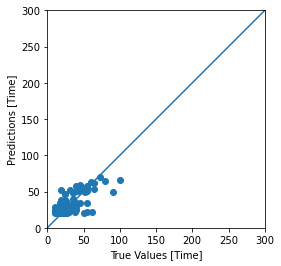

In [149]:
a = plt.axes(aspect='equal')
plt.scatter(test_labels_surgeons, predictions)
plt.xlabel('True Values [Time]')
plt.ylabel('Predictions [Time]')
lims = [0, 300]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

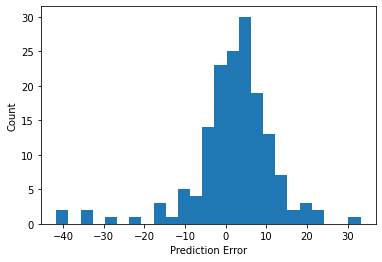

In [150]:
error = predictions - test_labels_surgeons
plt.hist(error, bins=25)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

In [151]:
dataset_predicton = {"Real Duration": test_labels_surgeons, "Planned by Cuf": test_CUF_labels_surgeons, "Labels from RuleFit": predictions}
dataset_predicton=pd.DataFrame(dataset_predicton)
dataset_predicton



,Real Duration,Planned by Cuf,Labels from RuleFit
0,16.0,20.0,21.623774
1,12.0,20.0,21.635446
2,39.0,20.0,29.156738
3,20.0,20.0,23.166788
4,20.0,20.0,22.253088
...,...,...,...
153,25.0,30.0,23.166788
154,19.0,30.0,38.683749
155,17.0,20.0,20.852036
156,14.0,30.0,23.354248


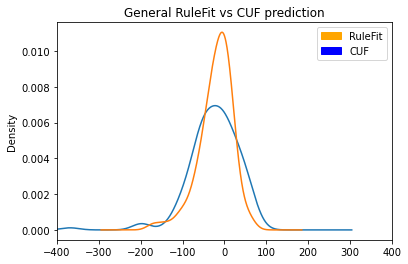

In [152]:

def percCal(x,y):
    return (x-y)*100/x

dataset_predicton['Error_RuleFit'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Labels from RuleFit'])
dataset_predicton['Error_CUF'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Planned by Cuf'])


dataset_predicton['Error_CUF'].plot(kind='density')
dataset_predicton['Error_RuleFit'].plot(kind='density')
plt.xlim([-400, 400])
plt.title('General RuleFit vs CUF prediction')
orange_patch = matplotlib.patches.Patch(color='orange', label='RuleFit')
blue_patch = matplotlib.patches.Patch(color='blue', label='CUF')
plt.legend(handles=[orange_patch,blue_patch])

In [153]:
#Overutilization 
CUF_overuse=dataset_predicton[dataset_predicton['Error_CUF']>10].shape[0]/dataset_predicton.shape[0]
RuleFit_overuse=dataset_predicton[dataset_predicton['Error_RuleFit']>10].shape[0]/dataset_predicton.shape[0]
#Underutilization
CUF_under=dataset_predicton[dataset_predicton['Error_CUF']<-10].shape[0]/dataset_predicton.shape[0]
RuleFit_under=dataset_predicton[dataset_predicton['Error_RuleFit']<-10].shape[0]/dataset_predicton.shape[0]
#Within
CUF_Within=dataset_predicton[dataset_predicton['Error_CUF'].abs()<=10].shape[0]/dataset_predicton.shape[0]
RuleFit_Within=dataset_predicton[dataset_predicton['Error_RuleFit'].abs()<=10].shape[0]/dataset_predicton.shape[0]

table2 = [['Model', 'Within', 'Overutilization','Underutilization'], ['CUF Model', CUF_Within, CUF_overuse,CUF_under], ['RuleFit Model', RuleFit_Within, RuleFit_overuse,RuleFit_under]]
print(tabulate(table2))

-------------  -------------------  -------------------  ------------------
Model          Within               Overutilization      Underutilization
CUF Model      0.13924050632911392  0.27848101265822783  0.5822784810126582
RuleFit Model  0.25316455696202533  0.189873417721519    0.5569620253164557
-------------  -------------------  -------------------  ------------------


----

# Design Rashomon Curve

In [51]:
number_of_rules=10

In [210]:
Rashomon_curve= {}

for j in range(0,2):
        # The Normalization layer
    Rashomon_curve[j] = {}

    for r in range(number_of_rules):
            # The Normalization layer
        Rashomon_curve[j][r] = {}

In [244]:
alphas=[]

for j in range(0,2):
    print(j)
    if j==0:
        train_dataset_surgeons= Datasets_surgeon_96440008['TrainSet']
        test_dataset_surgeons= Datasets_surgeon_96440008['TestSet']
        train_dataset_surgeons_categorical=Datasets_surgeon_96440008['TrainSet'][Datasets_surgeon_96440008['TrainSet']['Real Room Duration']>28]
        test_dataset_surgeons_categorical=Datasets_surgeon_96440008['TestSet'][Datasets_surgeon_96440008['TestSet']['Real Room Duration']>28]
        
        
    if j==1:
        train_dataset_surgeons= df_train_surgeon
        test_dataset_surgeons= df_test_surgeon
        train_dataset_surgeons_categorical= df_train_surgeon[df_train_surgeon['Real Room Duration']>28]
        test_dataset_surgeons_categorical= df_test_surgeon[df_test_surgeon['Real Room Duration']>28]
        
    
        
    r=1

    Parameters=Surgeon_model_96440008[Tuning_models['Decision_Tree'][2]]["Best_params_dict"]

    Decison_Tree=Tuning_models['Decision_Tree'][2](base_estimator=DecisionTreeRegressor(max_depth=Parameters["base_estimator__max_depth"]),n_estimators=Parameters["n_estimators"],random_state=123)
    print(Decison_Tree)

    regularizer=Tuning_models['Regularizers_1'][0]

    print(regularizer)

    Cs=Tuning_models['Cs']

    beta=0.1
    alpha=0.0001
    

    train_features_surgeons = train_dataset_surgeons.copy()

    train_labels_surgeons = train_features_surgeons.pop('Real Room Duration')

    train_CUF_labels_surgeons = train_features_surgeons.pop('CUF Planned Duration')
    
    test_features_surgeons = test_dataset_surgeons.copy()

    test_labels_surgeons = test_features_surgeons.pop('Real Room Duration')

    test_CUF_labels_surgeons = test_features_surgeons.pop('CUF Planned Duration')
    #-----
    
    

    train_features_surgeons_categorical = train_dataset_surgeons_categorical.copy()

    train_labels_surgeons_categorical = train_features_surgeons_categorical.pop('Real Room Duration')

    train_CUF_labels_surgeons_categorical = train_features_surgeons_categorical.pop('CUF Planned Duration')
    
    test_features_surgeons_categorical = test_dataset_surgeons_categorical.copy()

    test_labels_surgeons_categorical = test_features_surgeons_categorical.pop('Real Room Duration')

    test_CUF_labels_surgeons_categorical = test_features_surgeons_categorical.pop('CUF Planned Duration')




    #Dataset
    train_dataset_surgeons= np.asarray(train_dataset_surgeons).astype(np.float32)

    #Features
    train_features_surgeons= np.asarray(train_features_surgeons).astype(np.float32)

    #labels
    train_labels_surgeons= np.asarray(train_labels_surgeons).astype(np.float32)
    
    #Dataset
    train_dataset_surgeons_categorical= np.asarray(train_dataset_surgeons_categorical).astype(np.float32)

    #Features
    train_features_surgeons_categorical= np.asarray(train_features_surgeons_categorical).astype(np.float32)

    #labels
    train_labels_surgeons_categorical= np.asarray(train_labels_surgeons_categorical).astype(np.float32)
    
    
    ##---
    
    #Dataset
    test_dataset_surgeons= np.asarray(test_dataset_surgeons).astype(np.float32)

    #Features
    test_features_surgeons= np.asarray(test_features_surgeons).astype(np.float32)

    #labels
    test_labels_surgeons= np.asarray(test_labels_surgeons).astype(np.float32)
    
    #Dataset
    test_dataset_surgeons_categorical= np.asarray(test_dataset_surgeons_categorical).astype(np.float32)

    #Features
    test_features_surgeons_categorical= np.asarray(test_features_surgeons_categorical).astype(np.float32)

    #labels
    test_labels_surgeons_categorical= np.asarray(test_labels_surgeons_categorical).astype(np.float32)
    

    t=0
    for rules_n in range(number_of_rules):
        

        max_rules=(10-rules_n)*10

        len_reduce_rules=1000

        while len_reduce_rules>max_rules:

            Decison_Tree_tune=copy.deepcopy(Decison_Tree)

            rf = RuleFit_withoutCV.RuleFit(tree_generator=Decison_Tree_tune,alpha=alpha, Cs=Cs, max_iter=10e10, regularization=regularizer,n_jobs=-1)


            rf.fit(train_features_surgeons, train_labels_surgeons, feature_names=surgeoncolumns)

            rules = rf.get_rules()

            reduce_rules = rules[abs(rules.coef) !=0].sort_values("coef", ascending=False)


            len_reduce_rules=len(reduce_rules)

            print(len_reduce_rules)

            rf_score_train = np.round(mean_squared_error(rf.predict(train_features_surgeons),train_labels_surgeons,squared=False))

          

            rf_score = np.round(mean_squared_error(rf.predict(test_features_surgeons),test_labels_surgeons,squared=False))

            
            predictions=rf.predict(test_features_surgeons)

            .
                
        
            
        print(alphas)


        dataset_predicton = {"Real Duration": test_labels_surgeons, "Planned by Cuf": test_CUF_labels_surgeons, "Labels from RuleFit": predictions}
        dataset_predicton=pd.DataFrame(dataset_predicton)

        dataset_predicton['Error_RuleFit'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Labels from RuleFit'])
        dataset_predicton['Error_CUF'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Planned by Cuf'])

        CUF_overuse=dataset_predicton[dataset_predicton['Error_CUF']>10].shape[0]/dataset_predicton.shape[0]
        RuleFit_overuse=dataset_predicton[dataset_predicton['Error_RuleFit']>10].shape[0]/dataset_predicton.shape[0]
        #Underutilization
        CUF_under=dataset_predicton[dataset_predicton['Error_CUF']<-10].shape[0]/dataset_predicton.shape[0]
        RuleFit_under=dataset_predicton[dataset_predicton['Error_RuleFit']<-10].shape[0]/dataset_predicton.shape[0]
            #Within
        CUF_Within=dataset_predicton[dataset_predicton['Error_CUF'].abs()<=10].shape[0]/dataset_predicton.shape[0]
        RuleFit_Within=dataset_predicton[dataset_predicton['Error_RuleFit'].abs()<=10].shape[0]/dataset_predicton.shape[0]

        Rashomon_curve[j][rules_n].update({"Model": rf})
        Rashomon_curve[j][rules_n].update({"Rules": rules})

        Rashomon_curve[j][rules_n].update({"Rules_non0": reduce_rules})

        Rashomon_curve[j][rules_n].update({"Number Rules": len(reduce_rules)})
        Rashomon_curve[j][rules_n].update({"TestScore": rf_score})
        Rashomon_curve[j][rules_n].update({"TrainScore": rf_score_train})
        Rashomon_curve[j][rules_n].update({"Predictions": predictions})
        Rashomon_curve[j][rules_n].update({"Dataset_predicton": dataset_predicton})

        Rashomon_curve[j][rules_n].update({"Percentage": [RuleFit_Within, RuleFit_under, RuleFit_overuse]})
        Rashomon_curve[j][rules_n].update({"Percentage_CUF": [CUF_Within, CUF_under, CUF_overuse]})
        
        predictions_train=rf.predict(train_features_surgeons)
        
        rf_score_test =np.round(mean_squared_error(rf.predict(test_features_surgeons),test_labels_surgeons,squared=False))
        
        rf_score_train = np.round(mean_squared_error(rf.predict(train_features_surgeons),train_labels_surgeons,squared=False))
        
        
       
        
        rf_score_test_categorical = np.round(mean_squared_error(rf.predict(test_features_surgeons_categorical),test_labels_surgeons_categorical,squared=False))
        
        rf_score_train_categorical = np.round(mean_squared_error(rf.predict(train_features_surgeons_categorical),train_labels_surgeons_categorical,squared=False))
        

        dataset_predicton = {"Real Duration": train_labels_surgeons, "Planned by Cuf": train_CUF_labels_surgeons, "Labels from RuleFit": predictions_train}
        dataset_predicton=pd.DataFrame(dataset_predicton)

        dataset_predicton['Error_RuleFit'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Labels from RuleFit'])
        dataset_predicton['Error_CUF'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Planned by Cuf'])

        CUF_overuse=dataset_predicton[dataset_predicton['Error_CUF']>10].shape[0]/dataset_predicton.shape[0]
        RuleFit_overuse=dataset_predicton[dataset_predicton['Error_RuleFit']>10].shape[0]/dataset_predicton.shape[0]
        #Underutilization
        CUF_under=dataset_predicton[dataset_predicton['Error_CUF']<-10].shape[0]/dataset_predicton.shape[0]
        RuleFit_under=dataset_predicton[dataset_predicton['Error_RuleFit']<-10].shape[0]/dataset_predicton.shape[0]
            #Within
        CUF_Within=dataset_predicton[dataset_predicton['Error_CUF'].abs()<=10].shape[0]/dataset_predicton.shape[0]
        RuleFit_Within=dataset_predicton[dataset_predicton['Error_RuleFit'].abs()<=10].shape[0]/dataset_predicton.shape[0]

        Rashomon_curve[j][rules_n].update({"Score R2 Train": rf_score_train})
        Rashomon_curve[j][rules_n].update({"Score R2 Test": rf_score_test})
        Rashomon_curve[j][rules_n].update({"Score R2 Train Categorical": rf_score_train_categorical})
        Rashomon_curve[j][rules_n].update({"Score R2 Test Categorical": rf_score_test_categorical})
        
        Rashomon_curve[j][rules_n].update({"Percentage_Train": [RuleFit_Within, RuleFit_under, RuleFit_overuse]})
        
        #------
        
        predictions_test_categorical=rf.predict(test_features_surgeons_categorical)
        
        dataset_predicton = {"Real Duration": test_labels_surgeons_categorical, "Planned by Cuf": test_CUF_labels_surgeons_categorical, "Labels from RuleFit": predictions_test_categorical}
        dataset_predicton=pd.DataFrame(dataset_predicton)

        dataset_predicton['Error_RuleFit'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Labels from RuleFit'])
        dataset_predicton['Error_CUF'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Planned by Cuf'])

        CUF_overuse=dataset_predicton[dataset_predicton['Error_CUF']>10].shape[0]/dataset_predicton.shape[0]
        RuleFit_overuse=dataset_predicton[dataset_predicton['Error_RuleFit']>10].shape[0]/dataset_predicton.shape[0]
        #Underutilization
        CUF_under=dataset_predicton[dataset_predicton['Error_CUF']<-10].shape[0]/dataset_predicton.shape[0]
        RuleFit_under=dataset_predicton[dataset_predicton['Error_RuleFit']<-10].shape[0]/dataset_predicton.shape[0]
            #Within
        CUF_Within=dataset_predicton[dataset_predicton['Error_CUF'].abs()<=10].shape[0]/dataset_predicton.shape[0]
        RuleFit_Within=dataset_predicton[dataset_predicton['Error_RuleFit'].abs()<=10].shape[0]/dataset_predicton.shape[0]
        
        Rashomon_curve[j][rules_n].update({"Percentage Test Categorical": [RuleFit_Within, RuleFit_under, RuleFit_overuse]})
        
        
        #------
        
        predictions_train_categorical=rf.predict(train_features_surgeons_categorical)
        
        dataset_predicton = {"Real Duration": train_labels_surgeons_categorical, "Planned by Cuf": train_CUF_labels_surgeons_categorical, "Labels from RuleFit": predictions_train_categorical}
        dataset_predicton=pd.DataFrame(dataset_predicton)

        dataset_predicton['Error_RuleFit'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Labels from RuleFit'])
        dataset_predicton['Error_CUF'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Planned by Cuf'])

        CUF_overuse=dataset_predicton[dataset_predicton['Error_CUF']>10].shape[0]/dataset_predicton.shape[0]
        RuleFit_overuse=dataset_predicton[dataset_predicton['Error_RuleFit']>10].shape[0]/dataset_predicton.shape[0]
        #Underutilization
        CUF_under=dataset_predicton[dataset_predicton['Error_CUF']<-10].shape[0]/dataset_predicton.shape[0]
        RuleFit_under=dataset_predicton[dataset_predicton['Error_RuleFit']<-10].shape[0]/dataset_predicton.shape[0]
            #Within
        CUF_Within=dataset_predicton[dataset_predicton['Error_CUF'].abs()<=10].shape[0]/dataset_predicton.shape[0]
        RuleFit_Within=dataset_predicton[dataset_predicton['Error_RuleFit'].abs()<=10].shape[0]/dataset_predicton.shape[0]
        
        Rashomon_curve[j][rules_n].update({"Percentage Train Categorical": [RuleFit_Within, RuleFit_under, RuleFit_overuse]})
        


1
BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=4),
                 n_estimators=250, random_state=123)
Lasso


Objective did not converge. You might want to increase the number of iterations. Duality gap: 126662.81437849192, tolerance: 110.66890997069427


971


Objective did not converge. You might want to increase the number of iterations. Duality gap: 5041.471682259813, tolerance: 110.66890997069427


123


Objective did not converge. You might want to increase the number of iterations. Duality gap: 2117.211552958295, tolerance: 110.66890997069427


113


Objective did not converge. You might want to increase the number of iterations. Duality gap: 543.236731686804, tolerance: 110.66890997069427


96
[]


Objective did not converge. You might want to increase the number of iterations. Duality gap: 2711.170129266102, tolerance: 110.66890997069427


117


Objective did not converge. You might want to increase the number of iterations. Duality gap: 770.0078702052706, tolerance: 110.66890997069427


100


Objective did not converge. You might want to increase the number of iterations. Duality gap: 282.2311729611247, tolerance: 110.66890997069427


110


Objective did not converge. You might want to increase the number of iterations. Duality gap: 166.5195344800013, tolerance: 110.66890997069427


86
[]


Objective did not converge. You might want to increase the number of iterations. Duality gap: 126.90031434525736, tolerance: 110.66890997069427


97


Objective did not converge. You might want to increase the number of iterations. Duality gap: 138.211111381941, tolerance: 110.66890997069427


89
76
[]


Objective did not converge. You might want to increase the number of iterations. Duality gap: 252.8304779160535, tolerance: 110.66890997069427


65
[]


Objective did not converge. You might want to increase the number of iterations. Duality gap: 392.53154945612187, tolerance: 110.66890997069427


69
83
66


Objective did not converge. You might want to increase the number of iterations. Duality gap: 249.97576784016564, tolerance: 110.66890997069427


72
53
[]


Objective did not converge. You might want to increase the number of iterations. Duality gap: 223.82210222393041, tolerance: 110.66890997069427


77


Objective did not converge. You might want to increase the number of iterations. Duality gap: 110.7914120000205, tolerance: 110.66890997069427


62


Objective did not converge. You might want to increase the number of iterations. Duality gap: 170.14098052709596, tolerance: 110.66890997069427


68


Objective did not converge. You might want to increase the number of iterations. Duality gap: 159.429309955216, tolerance: 110.66890997069427


86


Objective did not converge. You might want to increase the number of iterations. Duality gap: 186.87752166611608, tolerance: 110.66890997069427


71
66
59
58


Objective did not converge. You might want to increase the number of iterations. Duality gap: 164.74818382586818, tolerance: 110.66890997069427


68
54
71
56


Objective did not converge. You might want to increase the number of iterations. Duality gap: 124.02129815414082, tolerance: 110.66890997069427


56


Objective did not converge. You might want to increase the number of iterations. Duality gap: 149.0297856121906, tolerance: 110.66890997069427


62
48
[]
47
61
51
63
52


Objective did not converge. You might want to increase the number of iterations. Duality gap: 280.06080579024274, tolerance: 110.66890997069427


63
46
47
54
55


Objective did not converge. You might want to increase the number of iterations. Duality gap: 120.94246597826714, tolerance: 110.66890997069427


44
50
48
49
48
42
41
36
[]
50
38
35
29
[]
45
51
38
60
41
44
43
31
44
38
30
44
34
34
35
36
36
33
41
24
37
37
40
51
36
51
40
50
39
35
29
27
41
35
44
35
23
39
37
45
32
26
34
51
24
32
25
32
29
22
26
22
28
26
24
42
40
30
28
32
25


Objective did not converge. You might want to increase the number of iterations. Duality gap: 131.53289047331782, tolerance: 110.66890997069427


38
27
40
31
28
32
24
33
38
20
[]
33
25
37
22
31
31
38
28
25
26
35
28
33
31
21
31
46
24
24
38
32
27
36
37
26
21
37
34
23
22
26
24
24
32
31
34
35
21
24
32
28
20
24
22
23
33
30
23
18
16
21
20
17
19
28
41
21
21
19
40
21
14
34
35
32
24
32
15
23
30
42
31
21
21
33
17
18
20
19
30
19
16
18
17
17
27
14
22
22
21
22
22
19
23
16
28
39
23
16
26
24
30
19
34
13
20
18
19
17
27
18
23
26
26
25
15
25
19
40
37
21
17
40
22
19
33
35
29
24
25
20
18
21
20
19
38
20
13
28
18
11
28
42
12
27
20
13
23
29
15
22
14
38
23
15
31
20
25
24
15
14
16
40
39
31
24
15
37
20
32
12
16
21
21
17
19
23
17
15
9
[]


In [85]:
# save the model to disk
Curve=1

rules=[100,90,80,70,60,50,40,30,20,10]


for i in range(len(rules)):
    
    Best_model=Rashomon_curve[Curve][i]['Model']
    
    filename="RuleFit_WithoutImbalanced_{}.sav".format(rules[i])
    print(filename)
    pickle.dump(Best_model, open(filename, 'wb'))

RuleFit_WithoutImbalanced_100.sav
RuleFit_WithoutImbalanced_90.sav
RuleFit_WithoutImbalanced_80.sav
RuleFit_WithoutImbalanced_70.sav
RuleFit_WithoutImbalanced_60.sav
RuleFit_WithoutImbalanced_50.sav
RuleFit_WithoutImbalanced_40.sav
RuleFit_WithoutImbalanced_30.sav
RuleFit_WithoutImbalanced_20.sav
RuleFit_WithoutImbalanced_10.sav


In [86]:
# save the model to disk
Curve=0

rules=[100,90,80,70,60,50,40,30,20,10]


for i in range(len(rules)):
    
    Best_model=Rashomon_curve[Curve][i]['Model']
    
    filename="RuleFit_Imbalanced_{}.sav".format(rules[i])
    print(filename)
    pickle.dump(Best_model, open(filename, 'wb'))

RuleFit_Imbalanced_100.sav
RuleFit_Imbalanced_90.sav
RuleFit_Imbalanced_80.sav
RuleFit_Imbalanced_70.sav
RuleFit_Imbalanced_60.sav
RuleFit_Imbalanced_50.sav
RuleFit_Imbalanced_40.sav
RuleFit_Imbalanced_30.sav
RuleFit_Imbalanced_20.sav
RuleFit_Imbalanced_10.sav


In [53]:
%store -r Rashomon_curve

----

In [54]:

loss_train=[]
loss_test=[]

Total_losses_train=[]
Total_losses_test=[]

Total_within_test=[]
Total_within_train=[]
Total_Diference=[]

Total_losses_r2_train=[]
Total_losses_r2_test=[]

for rules_n in range(number_of_rules):

    values_rmse_test=[]
    values_rmse_train=[]
    within_test=[]
    within_train=[]
    
    r2_test=[]
    r2_train=[]
    
    diference=[]
    for j in range(0,2):
        
        
        
        values_rmse_test+=[Rashomon_curve[j][rules_n]['TestScore']]
        values_rmse_train+=[Rashomon_curve[j][rules_n]['TrainScore']]
        diference+=[abs(Rashomon_curve[j][rules_n]['TestScore']-Rashomon_curve[j][rules_n]['TrainScore'])]
        
        
        r2_train+=[Rashomon_curve[j][rules_n]['Score R2 Train Categorical']]
        r2_test+=[Rashomon_curve[j][rules_n]['Score R2 Test Categorical']]
        
        within_train+=[Rashomon_curve[j][rules_n]['Percentage Train Categorical'][0]]
        within_test+=[Rashomon_curve[j][rules_n]['Percentage Test Categorical'][0]]
        
        
    
    
    Total_losses_train+=[values_rmse_train]
    Total_losses_test+=[values_rmse_test]
                  
    Total_losses_r2_train+=[r2_train]
    Total_losses_r2_test+=[r2_test]
    
    
    
    Total_within_train+=[within_train]
    Total_within_test+=[within_test]
    



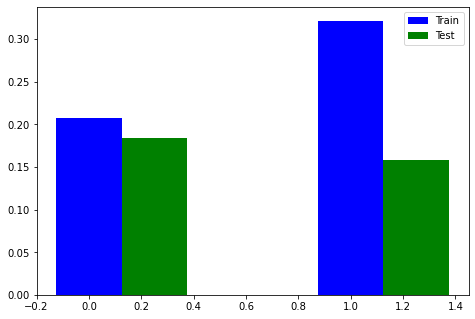

In [55]:
value=1

import numpy as np
import matplotlib.pyplot as plt

X = np.arange(2)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, Total_within_train[value], color = 'b', width = 0.25)
ax.bar(X + 0.25,Total_within_test[value] , color = 'g', width = 0.25)
ax.legend(['Train','Test'])

IndexError: list index out of range

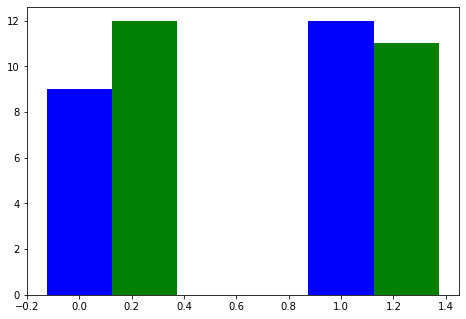

In [56]:
value=1

import numpy as np
import matplotlib.pyplot as plt

X = np.arange(2)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, Total_losses_train[value], color = 'b', width = 0.25)
ax.bar(X + 0.25,Total_losses_test[value] , color = 'g', width = 0.25)
ax.bar(X + 0.50, Total_Diference[value], color = 'r', width = 0.25)
ax.legend(['RMSE Train','RMSE Test','Loss Diference'])

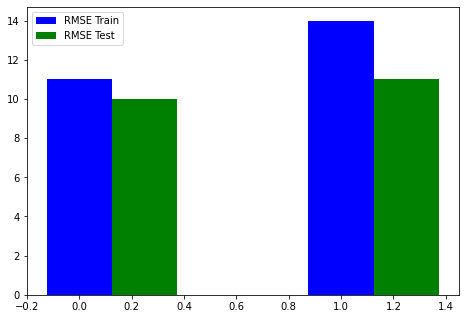

In [57]:
value=8

import numpy as np
import matplotlib.pyplot as plt

X = np.arange(2)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, Total_losses_train[value], color = 'b', width = 0.25)
ax.bar(X + 0.25,Total_losses_test[value] , color = 'g', width = 0.25)
ax.legend(['RMSE Train','RMSE Test'])

----

In [58]:
curve=0

In [59]:
Score_test=[]
Score_train=[]
Number_of_rules=[]
Within_Test=[]
Within_Train=[]

for rules_n in range(number_of_rules):

    Score_train_intercalar=abs(Rashomon_curve[curve][rules_n]['Score R2 Train Categorical'])
    Score_test_intercalar=abs(Rashomon_curve[curve][rules_n]['Score R2 Test Categorical'])
    Number_of_rules_intercalar=Rashomon_curve[curve][rules_n]['Number Rules']
    Within_intercalar_test=Rashomon_curve[curve][rules_n]['Percentage Test Categorical'][0]
    Within_intercalar_train=Rashomon_curve[curve][rules_n]['Percentage Train Categorical'][0]
     

    Score_test+=[Score_test_intercalar]
    Score_train+=[Score_train_intercalar]
    Number_of_rules+=[Number_of_rules_intercalar]
    Within_Test+=[Within_intercalar_test]
    Within_Train+=[Within_intercalar_train]

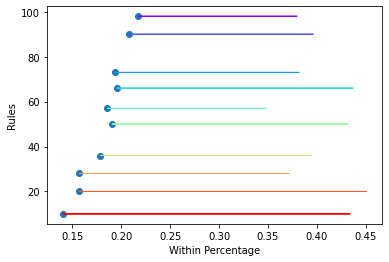

<Figure size 720x720 with 0 Axes>

In [60]:
colors = iter(plt.cm.rainbow(np.linspace(0, 1, len(Score_train))))


plt.scatter(Within_Train, Number_of_rules)
for i in range(len(Number_of_rules)):
    
    plt.arrow(x=Within_Train[i],y=Number_of_rules[i],dx=Within_Test[i],dy=0,color=next(colors))


plt.xlabel('Within Percentage')
plt.ylabel('Rules')
plt.figure(figsize=(10,10))
plt.show()

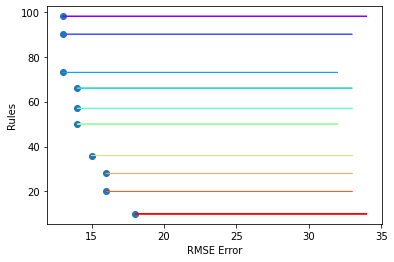

<Figure size 720x720 with 0 Axes>

In [61]:
colors = iter(plt.cm.rainbow(np.linspace(0, 1, len(Score_train))))

plt.xlabel('RMSE Error')
plt.ylabel('Rules')

plt.scatter(Score_train, Number_of_rules)
for i in range(len(Number_of_rules)):
    
    plt.arrow(x=Score_train[i],y=Number_of_rules[i],dx=Score_test[i],dy=0,color=next(colors))

    
plt.figure(figsize=(10,10))
plt.show()

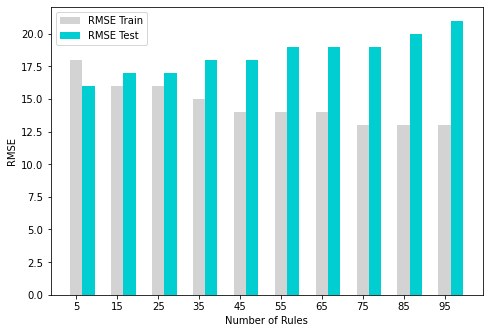

In [62]:
import numpy as np
import matplotlib.pyplot as plt

Rev_Score_train=Score_train[::-1]
Rev_Score_test=Score_test[::-1]

X = np.arange(5,105,10)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, Rev_Score_train, color = 'lightgrey', width =3)
ax.bar(X +3,Rev_Score_test , color = 'darkturquoise', width =3)
plt.ylabel('RMSE')   
plt.xlabel('Number of Rules')
plt.xticks(X)  
ax.legend(['RMSE Train','RMSE Test'])

In [63]:
curve=1

Score_test=[]
Score_train=[]
Number_of_rules=[]
Within_Test=[]
Within_Train=[]

for rules_n in range(number_of_rules):

    Score_train_intercalar=abs(Rashomon_curve[curve][rules_n]['Score R2 Train Categorical'])
    Score_test_intercalar=abs(Rashomon_curve[curve][rules_n]['Score R2 Test Categorical'])
    Number_of_rules_intercalar=Rashomon_curve[curve][rules_n]['Number Rules']
    Within_intercalar_test=Rashomon_curve[curve][rules_n]['Percentage Test Categorical'][0]
    Within_intercalar_train=Rashomon_curve[curve][rules_n]['Percentage Train Categorical'][0]
     
     

    Score_test+=[Score_test_intercalar]
    Score_train+=[Score_train_intercalar]
    Number_of_rules+=[Number_of_rules_intercalar]
    Within_Test+=[Within_intercalar_test]
    Within_Train+=[Within_intercalar_train]
    

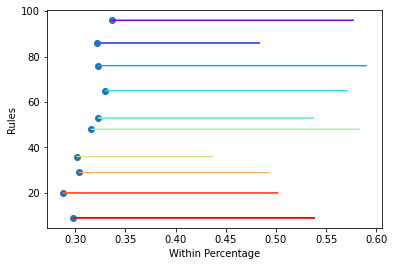

<Figure size 720x720 with 0 Axes>

In [64]:
colors = iter(plt.cm.rainbow(np.linspace(0, 1, len(Score_train))))


plt.scatter(Within_Train, Number_of_rules)
for i in range(len(Number_of_rules)):
    
    plt.arrow(x=Within_Train[i],y=Number_of_rules[i],dx=Within_Test[i],dy=0,color=next(colors))


plt.xlabel('Within Percentage')
plt.ylabel('Rules')
plt.figure(figsize=(10,10))
plt.show()

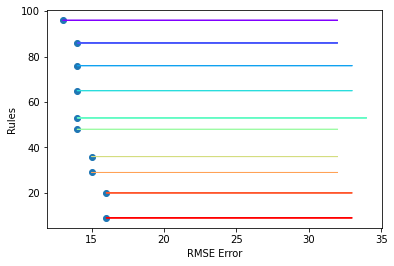

<Figure size 720x720 with 0 Axes>

In [65]:
colors = iter(plt.cm.rainbow(np.linspace(0, 1, len(Score_train))))

plt.xlabel('RMSE Error')
plt.ylabel('Rules')

plt.scatter(Score_train, Number_of_rules)
for i in range(len(Number_of_rules)):
    
    plt.arrow(x=Score_train[i],y=Number_of_rules[i],dx=Score_test[i],dy=0,color=next(colors))

    
plt.figure(figsize=(10,10))
plt.show()

In [66]:
Score_test

[19.0, 18.0, 19.0, 19.0, 20.0, 18.0, 17.0, 17.0, 17.0, 17.0]

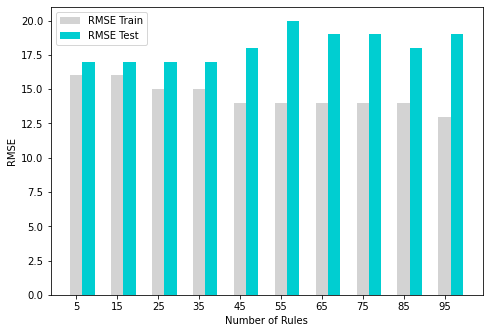

In [67]:
import numpy as np
import matplotlib.pyplot as plt

Rev_Score_train=Score_train[::-1]
Rev_Score_test=Score_test[::-1]

X = np.arange(5,105,10)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, Rev_Score_train, color = 'lightgrey', width =3)
ax.bar(X +3,Rev_Score_test , color = 'darkturquoise', width =3)
plt.ylabel('RMSE')   
plt.xlabel('Number of Rules')
plt.xticks(X)  
ax.legend(['RMSE Train','RMSE Test'])

* ## 5 seems the optimal value in Rashomon elbow

In [68]:
Curve=1
point=8

In [69]:
Best_model=Rashomon_curve[Curve][point]['Model']

In [70]:
Rashomon_curve[Curve][point]['Number Rules']

20

In [71]:
Best_model=Rashomon_curve[Curve][point]['Model']

In [72]:
Rashomon_curve[Curve][point]['Rules_non0']

,rule,type,coef,support,importance
526,Anesthesia <= 49.930179595947266 & Anesthesia ...,rule,1.112259e+01,0.292936,5.061994e+00
275,Anesthesia > 49.75395202636719 & Anesthesia <=...,rule,2.456789e+00,0.077670,6.575632e-01
121,I1 > 40.046932220458984 & Anesthesia > 22.7315...,rule,2.443913e+00,0.330764,1.149833e+00
273,I1 > 31.59053325653076,rule,1.545919e+00,0.389210,7.537455e-01
429,Hospitalization > 0.5 & I1 > 38.75601959228515...,rule,9.423382e-01,0.163799,3.487525e-01
36,Age <= 63.007076263427734 & I1 > 40.2878665924...,rule,6.519298e-01,0.123803,2.147178e-01
378,I1 > 41.77385711669922,rule,6.074381e-01,0.347684,2.892834e-01
50,I1 > 26.53037738800049 & Anesthesia > 49.75395...,rule,5.136388e-01,0.320900,2.397782e-01
477,I1 > 31.778352737426758 & Anesthesia > 47.2325...,rule,1.688873e-01,0.074705,4.440300e-02
518,I1 <= 31.648269653320312,rule,-5.854195e-16,0.616732,2.846209e-16


In [73]:
dataset_predicton=Rashomon_curve[Curve][point]['Dataset_predicton']

In [74]:
dataset_predicton=Rashomon_curve[Curve][point]['Dataset_predicton'][Rashomon_curve[Curve][point]['Dataset_predicton']['Real Duration']>28]
dataset_predicton

,Real Duration,Planned by Cuf,Labels from RuleFit,Error_RuleFit,Error_CUF
2,39.0,20,26.727085,31.469012,48.717949
8,44.0,20,57.237188,-30.084518,54.545455
13,38.0,20,32.550760,14.340106,47.368421
16,30.0,20,23.417345,21.942183,33.333333
21,39.0,20,57.215758,-46.707071,48.717949
24,35.0,20,27.357585,21.835471,42.857143
27,35.0,20,57.215758,-63.473593,42.857143
39,55.0,20,22.786845,58.569372,63.636364
50,35.0,20,26.727085,23.636899,42.857143
51,35.0,30,44.077952,-25.937006,14.285714


In [75]:
mean_squared_error(dataset_predicton['Labels from RuleFit'],dataset_predicton['Real Duration'],squared=False)

16.719176648351766

In [76]:
mean_squared_error(dataset_predicton['Planned by Cuf'],dataset_predicton['Real Duration'],squared=False)

27.77730993758073

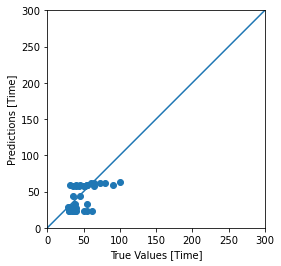

In [77]:
a = plt.axes(aspect='equal')
plt.scatter(dataset_predicton['Real Duration'], dataset_predicton['Labels from RuleFit'])
plt.xlabel('True Values [Time]')
plt.ylabel('Predictions [Time]')
lims = [0, 300]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

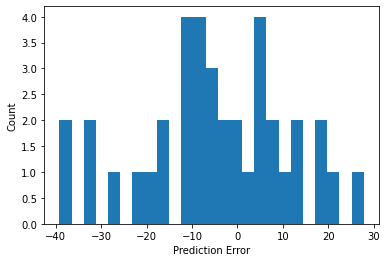

In [78]:
error = dataset_predicton['Labels from RuleFit'] - dataset_predicton['Real Duration']
plt.hist(error, bins=25)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

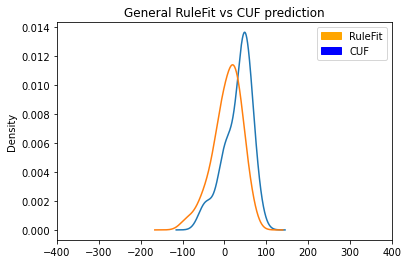

In [79]:

def percCal(x,y):
    return (x-y)*100/x

def percCal2(x,y):
    return abs(x-y)


dataset_predicton['Error_RuleFit'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Labels from RuleFit'])
dataset_predicton['Error_CUF'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Planned by Cuf'])
dataset_predicton['Minutes_RuleFit'] = percCal2(dataset_predicton['Real Duration'], dataset_predicton['Labels from RuleFit'])
dataset_predicton['Minutes_CUF'] = percCal2(dataset_predicton['Real Duration'], dataset_predicton['Planned by Cuf'])

dataset_predicton['Error_CUF'].plot(kind='density')
dataset_predicton['Error_RuleFit'].plot(kind='density')
plt.xlim([-400, 400])
plt.title('General RuleFit vs CUF prediction')
orange_patch = matplotlib.patches.Patch(color='orange', label='RuleFit')
blue_patch = matplotlib.patches.Patch(color='blue', label='CUF')
plt.legend(handles=[orange_patch,blue_patch])

In [80]:
dataset_predicton['Minutes_CUF'].sum()/154 

5.259740259740259

In [81]:
dataset_predicton['Minutes_RuleFit'].sum()/154

3.2687874403702484

In [82]:
#Overutilization 
CUF_overuse=dataset_predicton[dataset_predicton['Error_CUF']>10].shape[0]/dataset_predicton.shape[0]
RuleFit_overuse=dataset_predicton[dataset_predicton['Error_RuleFit']>10].shape[0]/dataset_predicton.shape[0]
#Underutilization
CUF_under=dataset_predicton[dataset_predicton['Error_CUF']<-10].shape[0]/dataset_predicton.shape[0]
RuleFit_under=dataset_predicton[dataset_predicton['Error_RuleFit']<-10].shape[0]/dataset_predicton.shape[0]
#Within
CUF_Within=dataset_predicton[dataset_predicton['Error_CUF'].abs()<=10].shape[0]/dataset_predicton.shape[0]
RuleFit_Within=dataset_predicton[dataset_predicton['Error_RuleFit'].abs()<=10].shape[0]/dataset_predicton.shape[0]

table2 = [['Model', 'Within', 'Overutilization','Underutilization'], ['CUF Model', CUF_Within, CUF_overuse,CUF_under], ['RuleFit Model', RuleFit_Within, RuleFit_overuse,RuleFit_under]]
print(tabulate(table2))

-------------  -------------------  ------------------  -------------------
Model          Within               Overutilization     Underutilization
CUF Model      0.18421052631578946  0.7368421052631579  0.07894736842105263
RuleFit Model  0.21052631578947367  0.5263157894736842  0.2631578947368421
-------------  -------------------  ------------------  -------------------


In [33]:
dataset_predicton['Labels from RuleFit'].to_csv('Labels_RuleFit_surgeon_notimbalance',index=False)

* Generalization Set

In [34]:
generalization_dataset_surgeons=Datasets_surgeon_96440008['GeneralizationSet_After_Encoding']

generalization_features_surgeons = generalization_dataset_surgeons.copy()
generalization_labels_surgeons = generalization_features_surgeons.pop('Real Room Duration')
generalization_CUF_labels_surgeons = generalization_features_surgeons.pop('CUF Planned Duration')

generalization_dataset_surgeons= np.asarray(generalization_dataset_surgeons).astype(np.float32)

    #Features
generalization_features_surgeons= np.asarray(generalization_features_surgeons).astype(np.float32)

#labels
generalization_labels_surgeons= np.asarray(generalization_labels_surgeons).astype(np.float32)


In [35]:
labels_generalization=Best_model.predict(generalization_features_surgeons)
dataset_predicton_generalization = {"Real Duration": generalization_labels_surgeons, "Planned by Cuf": generalization_CUF_labels_surgeons, "Labels from RuleFit": labels_generalization}
    
dataset_predicton_generalization=pd.DataFrame(dataset_predicton_generalization)
dataset_predicton_generalization

,Real Duration,Planned by Cuf,Labels from RuleFit
255,20.0,20,22.786845
53,17.0,20,26.727085
480,15.0,30,22.786845
562,21.0,30,22.786845
1336,21.0,20,22.786845
...,...,...,...
649,28.0,30,23.417345
475,35.0,30,22.786845
1365,20.0,30,22.786845
1238,22.0,30,22.786845


In [36]:
dataset=dataset_predicton_generalization[dataset_predicton_generalization['Real Duration']>28]

In [37]:
mean_squared_error(dataset['Labels from RuleFit'],dataset['Real Duration'],squared=False)

18.211655182341122

In [38]:
mean_squared_error(dataset['Planned by Cuf'],dataset['Real Duration'],squared=False)

Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.


29.34411223869148

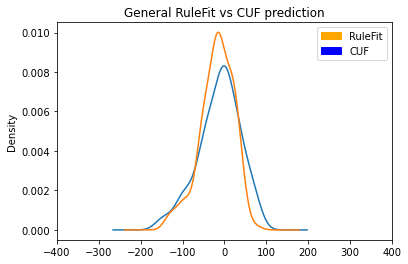

In [37]:

def percCal(x,y):
    return (x-y)*100/x

def percCal2(x,y):
    return abs(x-y)


dataset_predicton_generalization['Error_RuleFit'] = percCal(dataset_predicton_generalization['Real Duration'], dataset_predicton_generalization['Labels from RuleFit'])
dataset_predicton_generalization['Error_CUF'] = percCal(dataset_predicton_generalization['Real Duration'], dataset_predicton_generalization['Planned by Cuf'])
dataset_predicton_generalization['Minutes_RuleFit'] = percCal2(dataset_predicton_generalization['Real Duration'], dataset_predicton_generalization['Labels from RuleFit'])
dataset_predicton_generalization['Minutes_CUF'] = percCal2(dataset_predicton_generalization['Real Duration'], dataset_predicton_generalization['Planned by Cuf'])


dataset_predicton_generalization['Error_CUF'].plot(kind='density')
dataset_predicton_generalization['Error_RuleFit'].plot(kind='density')
plt.xlim([-400, 400])
plt.title('General RuleFit vs CUF prediction')
orange_patch = matplotlib.patches.Patch(color='orange', label='RuleFit')
blue_patch = matplotlib.patches.Patch(color='blue', label='CUF')
plt.legend(handles=[orange_patch,blue_patch])

In [38]:
#Overutilization 
CUF_overuse=dataset_predicton_generalization[dataset_predicton_generalization['Error_CUF']>10].shape[0]/dataset_predicton_generalization.shape[0]
RuleFit_overuse=dataset_predicton_generalization[dataset_predicton_generalization['Error_RuleFit']>10].shape[0]/dataset_predicton_generalization.shape[0]
#Underutilization
CUF_under=dataset_predicton_generalization[dataset_predicton_generalization['Error_CUF']<-10].shape[0]/dataset_predicton_generalization.shape[0]
RuleFit_under=dataset_predicton_generalization[dataset_predicton_generalization['Error_RuleFit']<-10].shape[0]/dataset_predicton_generalization.shape[0]
#Within
CUF_Within=dataset_predicton_generalization[dataset_predicton_generalization['Error_CUF'].abs()<=10].shape[0]/dataset_predicton_generalization.shape[0]
RuleFit_Within=dataset_predicton_generalization[dataset_predicton_generalization['Error_RuleFit'].abs()<=10].shape[0]/dataset_predicton_generalization.shape[0]

table2 = [['Model', 'Within', 'Overutilization','Underutilization'], ['CUF Model', CUF_Within, CUF_overuse,CUF_under], ['RuleFit Model', RuleFit_Within, RuleFit_overuse,RuleFit_under]]
print(tabulate(table2))

-------------  -------------------  ------------------  -------------------
Model          Within               Overutilization     Underutilization
CUF Model      0.20253164556962025  0.3291139240506329  0.46835443037974683
RuleFit Model  0.15822784810126583  0.2721518987341772  0.569620253164557
-------------  -------------------  ------------------  -------------------


In [59]:
dataset_predicton_generalization[dataset_predicton_generalization['Error_RuleFit']<-10]['Minutes_RuleFit'].sum()/dataset_predicton_generalization[dataset_predicton_generalization['Error_RuleFit']<-10].shape[0]

8.465859153002993

In [60]:
dataset_predicton_generalization[dataset_predicton_generalization['Error_CUF']<-10]['Minutes_CUF'].sum()/dataset_predicton_generalization[dataset_predicton_generalization['Error_CUF']<-10].shape[0]

9.324324324324325

In [61]:
dataset_predicton_generalization[dataset_predicton_generalization['Error_RuleFit']>10]['Minutes_RuleFit'].sum()/dataset_predicton_generalization[dataset_predicton_generalization['Error_RuleFit']>10].shape[0]

13.337857311295664

In [62]:
dataset_predicton_generalization[dataset_predicton_generalization['Error_CUF']>10]['Minutes_CUF'].sum()/dataset_predicton_generalization[dataset_predicton_generalization['Error_CUF']>10].shape[0]

20.692307692307693

In [58]:
dataset_predicton_generalization[dataset_predicton_generalization['Error_RuleFit']>-10].shape[0]

68

In [39]:
dataset_predicton_generalization['Minutes_CUF'].sum()/154

11.64935064935065

In [40]:
dataset_predicton_generalization['Minutes_RuleFit'].sum()/154

8.916092021797274

In [42]:
np.round(mean_squared_error(labels_generalization,generalization_labels_surgeons,squared=False))
        
        

12.0

In [43]:
np.round(mean_squared_error(generalization_CUF_labels_surgeons,generalization_labels_surgeons,squared=False))
        

Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.


18.0

In [1]:
dataset_predicton['Labels from RuleFit']>28

NameError: name 'dataset_predicton' is not defined

In [44]:
np.round(mean_squared_error(dataset_predicton['Labels from RuleFit']>28,dataset_predicton['Real Duration'],squared=False))
   

11.0

In [45]:
np.round(mean_squared_error(dataset_predicton['Planned by Cuf'],dataset_predicton['Real Duration'],squared=False))


17.0

* ## Imbalance

In [12]:
Curve=0
point=7

In [13]:
Best_model=Rashomon_curve[Curve][point]['Model']

In [14]:
Rashomon_curve[Curve][point]['Rules_non0']

,rule,type,coef,support,importance
129,Surgery Number Performed_perDoctor <= 1120.0 &...,rule,6.913744,0.046366,1.453796
5,Procedures_I,linear,5.860281,1.000000,1.000327
160,I1 > 36.49469757080078 & Month > 27.6935205459...,rule,3.763188,0.024752,0.584686
237,I1 > 43.27751541137695 & Hospitalization <= 0....,rule,3.099028,0.037371,0.587791
276,Hospitalization > 0.5 & Surgery Number Perform...,rule,2.576730,0.003759,0.157692
582,I1 > 34.569496154785156 & Surgery Number Perfo...,rule,2.045003,0.038896,0.395395
448,Hospitalization > 0.5 & Surgery Number Perform...,rule,1.654113,0.083127,0.456657
383,I1 > 36.49469757080078 & Hospitalization <= 0....,rule,1.402258,0.047273,0.297590
16,Month > 27.693520545959473 & I1 > 43.277515411...,rule,0.366899,0.027534,0.060037
500,I1 > 28.77825164794922,rule,0.293842,0.217933,0.121310


In [304]:
dataset_predicton=Rashomon_curve[Curve][point]['Dataset_predicton']
dataset_predicton

,Real Duration,Planned by Cuf,Labels from RuleFit,Error_RuleFit,Error_CUF
1,16.0,20,23.849821,-49.061381,-25.0
2,12.0,20,20.663673,-72.197277,-66.666667
3,39.0,20,25.426031,34.805050,48.717949
8,20.0,20,22.798091,-13.990454,0.0
25,20.0,20,21.689604,-8.448022,0.0
...,...,...,...,...,...
1553,25.0,30,22.649252,9.402991,-20.0
1563,19.0,30,29.869791,-57.209425,-57.894737
1574,17.0,20,20.663673,-21.551019,-17.647059
1577,14.0,30,22.525332,-60.895226,-114.285714


In [305]:
#Overutilization 
CUF_overuse=dataset_predicton[dataset_predicton['Error_CUF']>10].shape[0]/dataset_predicton.shape[0]
RuleFit_overuse=dataset_predicton[dataset_predicton['Error_RuleFit']>10].shape[0]/dataset_predicton.shape[0]
#Underutilization
CUF_under=dataset_predicton[dataset_predicton['Error_CUF']<-10].shape[0]/dataset_predicton.shape[0]
RuleFit_under=dataset_predicton[dataset_predicton['Error_RuleFit']<-10].shape[0]/dataset_predicton.shape[0]
#Within
CUF_Within=dataset_predicton[dataset_predicton['Error_CUF'].abs()<=10].shape[0]/dataset_predicton.shape[0]
RuleFit_Within=dataset_predicton[dataset_predicton['Error_RuleFit'].abs()<=10].shape[0]/dataset_predicton.shape[0]

table2 = [['Model', 'Within', 'Overutilization','Underutilization'], ['CUF Model', CUF_Within, CUF_overuse,CUF_under], ['RuleFit Model', RuleFit_Within, RuleFit_overuse,RuleFit_under]]
print(tabulate(table2))

-------------  -------------------  -------------------  ------------------
Model          Within               Overutilization      Underutilization
CUF Model      0.13924050632911392  0.27848101265822783  0.5822784810126582
RuleFit Model  0.25949367088607594  0.2088607594936709   0.5316455696202531
-------------  -------------------  -------------------  ------------------


In [306]:
dataset_predicton['Labels from RuleFit'].to_csv('Labels_RuleFit_surgeon_imbalance',index=False)